# Preparing The Data

## Reading the dataset

In [1]:
!gdown "1WMfGVZ6W3EWTI8HI2DzcJjIpcl1bp9xf"

Downloading...
From: https://drive.google.com/uc?id=1WMfGVZ6W3EWTI8HI2DzcJjIpcl1bp9xf
To: /content/IMDB Dataset.csv
100% 66.2M/66.2M [00:00<00:00, 187MB/s]


In [2]:
import pandas as pd

df_review = pd.read_csv('IMDB Dataset.csv')

In [3]:
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df_positive = df_review[df_review['sentiment']=='positive']
df_negative = df_review[df_review['sentiment']=='negative']

df_review_bal = pd.concat([df_positive, df_negative])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

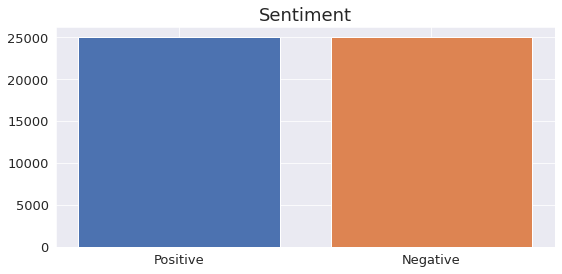

In [6]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [7]:
df_review_bal['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## Pré-processamento

* Correcting row breaks
* Removing URLs
* Tokenization
* Removing punctuations like . , ! $( ) * % @
* Removing Stop words
* Lower casing
* Lemmatization


In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


def process_data(corpus):
    data = []
    for sent in corpus:
        # remove <br />
        sent = sent.replace('<br />', '\n')

        # remove link
        sent = re.sub(r'http\S+', 'http', sent)
        tokens = word_tokenize(sent)

        # remove punctuation
        puncs = string.punctuation
        tokens = [x for x in tokens if x not in puncs]

        # stopwords
        stopwords = nltk.corpus.stopwords.words('english')
        tokens = [x for x in tokens if x not in stopwords]

        # lemmatization
        wordnet_lemmatizer = WordNetLemmatizer()
        tokens = [wordnet_lemmatizer.lemmatize(x) for x in tokens]

        # lowercase
        data += [" ".join([x.lower() for x in tokens])]

    return pd.Series(data)

In [10]:
original_data = df_review_bal['review']
processed_data = process_data(original_data)

In [11]:
original_data[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [12]:
type(original_data)

pandas.core.series.Series

In [13]:
processed_data[1]

"a wonderful little production the filming technique unassuming- old-time-bbc fashion give comforting sometimes discomforting sense realism entire piece the actor extremely well chosen- michael sheen `` got polari '' voice pat you truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece a masterful production one great master 's comedy life the realism really come home little thing fantasy guard rather use traditional 'dream technique remains solid disappears it play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell 's mural decorating every surface terribly well done"

In [14]:
type(processed_data)

pandas.core.series.Series

## Encoding labels

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_review_bal['sentiment'])

LabelEncoder()

In [16]:
le.classes_

array(['negative', 'positive'], dtype=object)

In [17]:
encoded_labels = le.transform(df_review_bal['sentiment'])
encoded_labels

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
le.inverse_transform(encoded_labels)

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

## Splitting data into train and test set

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

In [21]:
train_x, train_y = process_data(train['review']), pd.Series(le.transform(train['sentiment']))
test_x, test_y = process_data(test['review']), pd.Series(le.transform(test['sentiment']))

In [22]:
train_x

0        the man white suit one delightful comedy ealin...
1        throw momma n't dated 's funny released a genu...
2        diane keaton gave outstanding performance rath...
3        this thoroughly enjoyable well-acted film it f...
4        robin williams gave fine performance the night...
                               ...                        
33495    the china syndrome perfectly paced thriller sl...
33496    this thrown together piece fecal matter add to...
33497    isabel allende 's magical lyrical novel three ...
33498    it 's unbelievable fourth better second third ...
33499    first thing first edison chen fantastic believ...
Length: 33500, dtype: object

In [23]:
train_y

0        1
1        1
2        1
3        1
4        0
        ..
33495    1
33496    0
33497    0
33498    1
33499    1
Length: 33500, dtype: int64

# Text Representation (Bag of Words)

## Turning our text data into numerical vectors

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

<33500x81536 sparse matrix of type '<class 'numpy.float64'>'
	with 2834878 stored elements in Compressed Sparse Row format>

In [25]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector, index=train_x.index, columns=tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00000000000,00001,000s,001,003830,006,0069,007,...,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
test_x_vector = tfidf.transform(test_x)

# Model Selection

##SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [ ]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

##Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

##Naive Bayes

In [ ]:
# from sklearn.naive_bayes import GaussianNB

# gnb = GaussianNB()
# gnb.fit(train_x_vector, train_y)

TypeError: ignored

##Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='sag')
log_reg.fit(train_x_vector, train_y)

LogisticRegression(solver='sag')

#Model Evaluation

##Mean Accuracy

In [29]:
print('SVM: ', svc.score(test_x_vector, test_y))
print('Decision tree: ', dec_tree.score(test_x_vector, test_y))
#print('Naive Bayes: ', gnb.score(test_x_vector.toarray(), test_y))
print('Logistic Regression: ', log_reg.score(test_x_vector, test_y))

Decision tree:  0.7246666666666667
Logistic Regression:  0.8919393939393939


##F1 Score

In [ ]:
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# F1 score reaches its best value at 1 and worst score at 0.

from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector), average=None)

array([0.8369906 , 0.84750733])

##Classification report

In [ ]:
# Favorito da Letícia
from sklearn.metrics import classification_report

y_true = le.inverse_transform(test_y)
y_pred = le.inverse_transform(svc.predict(test_x_vector))

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

    negative       0.88      0.80      0.84       335
    positive       0.81      0.89      0.85       325

    accuracy                           0.84       660
   macro avg       0.85      0.84      0.84       660
weighted avg       0.85      0.84      0.84       660



##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true, y_pred)
conf_mat

array([[267,  68],
       [ 36, 289]])

# Tuning the Model

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#set the parameters
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)

svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [ ]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 4, 'kernel': 'rbf'}
SVC(C=4)


In [ ]:
svc = SVC(C=4)
svc.fit(train_x_vector, train_y)
print('SVM: ', svc.score(test_x_vector, test_y))

SVM:  0.8348484848484848


In [ ]:
y_true = le.inverse_transform(test_y)
y_pred = le.inverse_transform(svc.predict(test_x_vector))
print(classification_report(y_true, y_pred, labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.81      0.87      0.84       325
    negative       0.87      0.80      0.83       335

    accuracy                           0.83       660
   macro avg       0.84      0.84      0.83       660
weighted avg       0.84      0.83      0.83       660



In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true, y_pred, labels=['positive', 'negative'])
conf_mat

array([[284,  41],
       [ 68, 267]])

# KFold Cross-Validation

https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

In [30]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=3, score_method='classification'):
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
            This is the machine learning algorithm to be used for training.
    _X: array
        This is the matrix of features.
    _y: array
        This is the target variable.
    _cv: int, default=5
        Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'MAE', 'MSE',
    'RMSE', 'r2' for both training set and validation set.
    '''
    if score_method == 'classification':
        _scoring = ['accuracy', 'precision', 'recall', 'f1']
    else:
        _scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 
                    'neg_root_mean_squared_error', 'r2']
    results = cross_validate(estimator=model,
                            X=_X,
                            y=_y,
                            cv=_cv,
                            scoring=_scoring,
                            return_train_score=True)

    return {k:abs(v.mean()) for k,v in results.items() if v.mean()!=0}

In [31]:
import matplotlib.pyplot as plt
import numpy as np


# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    '''Function to plot a grouped bar chart showing the training and validation
    results of the ML model in each fold after applying K-fold cross-validation.
    Parameters
    ----------
    x_label: str, 
    Name of the algorithm used for training e.g 'Decision Tree'
    
    y_label: str, 
    Name of metric being visualized e.g 'Accuracy'
    plot_title: str, 
    This is the title of the plot e.g 'Accuracy Plot'
    
    train_result: list, array
    This is the list containing either training precision, accuracy, or f1 score.

    val_result: list, array
    This is the list containing either validation precision, accuracy, or f1 score.
    Returns
    -------
    The function returns a Grouped Barchart showing the training and validation result
    in each fold.
    '''

    # Set size of plot
    plt.figure(figsize=(12,6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
def compare_models(models: dict, validation_func, folds=3):
    results = {}

    for name, model in models.items():
        result = validation_func(model['pipe'], model['_X'], model['_y'], folds)
        results[name] = result
    
    return results

# Validação com K-Fold

In [33]:
_X = tfidf.transform(process_data(df_review_bal['review']))
_y = pd.Series(le.transform(df_review_bal['sentiment'])).tolist()

In [34]:
_y = pd.Series(le.transform(df_review_bal['sentiment'])).tolist()

In [35]:
models = {
    'logistic_regression': {'pipe': log_reg,
                            '_X': _X,
                            '_y': _y
    },
    'decision_tree': {'pipe': dec_tree, 
                      '_X': _X,
                      '_y': _y
    },
    'svm': {'pipe': svc, 
            '_X': _X,
            '_y': _y
    },
}

In [36]:
results = compare_models(models, cross_validation, folds=3)

In [ ]:
results